
<h1 style="text-align: center;"><b><i>Image Compression</i> dengan SVD</b></h1>

<h5 style="text-align: center;"> Muhammad Zufar Syaafi' - 23/517479/TK/56923</h5>


---

## A. Definisi dan Teori


_Singular Value Decompositions_ (SVD) dari suatu matriks $A$ dengan ukuran $m \times n$ adalah faktorisasi matriks tersebut menjadi tiga matriks berbeda yang dinotasikan dengan $U, \Sigma, V$. Pada umumnya matriks $A$ dapat didefinisikan sebagai berikut:
$$A = U\Sigma V^T$$
Bentuk ini tentu tidaklah sepenuhnya berbeda dengan _Eigen Value Decompositions_ (EVD) dari sebuah matriks persegi non-singuar $A$ yang didefinisikan sebagai berikut: $A = X\Lambda X^{-1}$ atau bahkan sangat mirip dengan EVD dari sebuah matriks simetris real $S$ yang didefinisikan sebagai berikut: $S = Q\Lambda Q^T$. Perbedaan paling fundamnetal pada konsep-konsep di atas hanyalah pada bentuk matriks $A$ dan $S$. SVD tidaklah memiliki syarat khusus bagaimana bentuk matriks yang akan difaktorisasi, bahkan matriksnya dapat berupa matriks non-persegi.

Telah diketahui bentuk umum matriks yang didefinisikan oleh SVD, selanjutnya perlu diketahui pula apa yang dimaksud dengan tiga buah matriks hasil faktorisasi SVD yaitu $U, \Sigma, V$. Matriks $V$ dapat didefinisikan sebagai matriks _orthonormal eigenvector_ dari hasil operasi $A^TA$ dengan ukuran $n \times n$, sedangkan matriks $\Sigma$ adalah akar dari matriks diagonal yang berisi _eigenvalue_ dari operasi $A^TA$ dengan ukuran $m \times n$. Adapun matriks $U$ dapat didefiniskan sebagai matriks _orthonormal eigenvector_ dari operasi $AA^T$ dengan ukuran $m \times m$, tetapi untuk meminimalisir kesalahan pada matriks $U$, dapat digunakan $U = AV\Sigma^{-1}$. Berdasarkan penjelasan tersebut, dapat diketahui bahwa matriks $U$ dan $V$ berturut-turut berkorespodensi dengan _columns spaces_ serta _left nullspace_ dan _rows spaces_ serta _nullspace_ dari matriks $A$. 

Untuk lebih mempermudah mengetahui hubungan matriks $U, \Sigma, V$ terhadap matriks $A$, berikut ini ringkasannya,

- $U \in \mathbb{R}^{m \times m} \implies$ kolom matriks $U$ dari kolom $1$ hingga kolom $r$ adalah _columns space_ $A$, sedangkan sisanya adalah _left nullspace_ $A$
- $\Sigma \in \mathbb{R}^{m \times n} \implies$ diagonal matriks $\Sigma$ merupakan _eigenvalue_ $A$
- $V \in \mathbb{R}^{n \times n} \implies$ kolom matriks $V$ dari kolom $1$ hingga kolom $r$ adalah _rows space_ $A$, sedangkan sisanya adalah _nullspace_ $A$






## B. Konsep SVD dalam _Image Compression_

Dalam komputer, sebuah gambar sejatinya adalah sebuah matriks dengan ukuran tertentu yang elemen-elemennya mewakili gelap terang suatu warna. Tentu jika gambar adalah sebuah matriks, maka bukan mustahil untuk melakukan operasi-operasi matriks terhadap suatu gambar. Tak terkecuali operasi SVD ini.

Seperti yang dijelaskan pada poin A, SVD akan melakukan faktorisasi suatu matriks menjadi tiga matriks $U, \Sigma, V$, dimana $U$ dan $V$ merupakan _orthonormal eigenvector_ dan matriks $\Sigma$ merupakan _eigenvalue_. Dalam kasus matriks gambar $A$, elemen-elemen dari matriks $A$ sangat dipengaruhi oleh matriks $U, \Sigma, V$. Sedangkan, dalam konsep EVD, tidak semua _eigenvalue_ berdampak signifikan terhadap suatu matriks. Dengan begitu, matriks $\Sigma$ bisa diatur sedemikian rupa untuk hanya memiliki _eigenvalue_ yang signifikan dan itulah konsep _image compression_ menggunakan SVD.

Jadi, pada dasarnya proses yang dilakukan hanyalah mengeliminasi _eigenvector_ dan _eigenvalue_ dari sebuah matriks gambar yang dianggap tidak signifikan, sehingga gambar yang dihasilkan akan menjadi lebih ringan dan efisien tanpa banyak mengurangi kualitas gambar asli.


## C. Implementasi dan Analisis

Implementasi _image compression_ dengan konsep SVD akan dilakukan menggunakan bantuan bahasa pemrograman Python. Adapun langkah-langkahnya adalah sebagai berikut:

### 1. Mengimport selrurh library yang dibutuhkan

Pada program ini akan digunakan empat library, yaitu `Pillow`, `numpy`, `pandas`, `matplotlib`, dan `requests`. Library `Pillow` digunakan untuk membaca dan menyimpan gambar ,library `numpy` digunakan untuk operasi matriks, library `pandas` untuk pemrosesan data, library `matplotlib` untuk visualisasi data, dan library `requests` untuk mengambil data dari internet.

In [2]:
from PIL import Image
import numpy as np
import requests as rq
import matplotlib.pyplot as plt

### 2. Mengimport gambar dan menyimpannya ke dalam bentuk array (matriks)

Gambar yang akan digunakan adalah gambar dari website milik UGM. Untuk dapat mengambil gambar dari internet, digunakan library `requests`. Setelah url dari gambar telah diambil, gambar tersebut akan disimpan dalam sebuah variabel bernama `img` dan juga mengubahnya menjadi hitam putihdengan menggunakan library `Pillow`.

Pada program ini, gambar yang diambil akan ditampilkan ke dalam bentuk array (matriks) dengan menggunakan library `numpy` dan disimpan ke dalam variabel atau matriks $A$.

In [3]:
# import gambar
req = rq.get("https://ugm.ac.id/wp-content/uploads/2023/04/About-Hero.jpg", stream=True)
img = Image.open(req.raw)
img = img.convert("L")

# menyimpan ke dalam bentuk array
A = np.array(img)
print(f"Bentuk Array dari Gambar:\n\n {A}")
print(f"\nUkuran Array dari Gambar: {np.shape(A)}")

Bentuk Array dari Gambar:

 [[58 58 57 ... 38 38 40]
 [59 59 58 ... 32 33 35]
 [58 58 58 ... 36 37 38]
 ...
 [35 43 57 ... 38 39 40]
 [29 37 52 ... 38 39 40]
 [25 30 42 ... 36 37 38]]

Ukuran Array dari Gambar: (709, 1260)


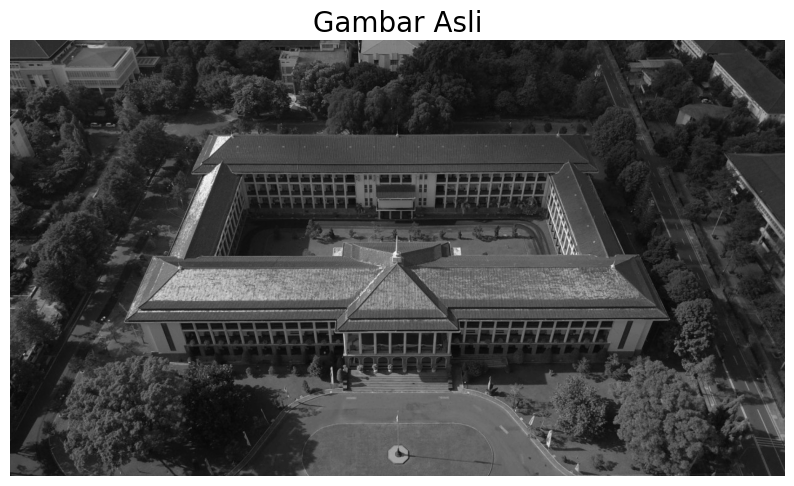

In [4]:
# menampilkan gambar
plt.figure(figsize=(10, 10))
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title('Gambar Asli', fontsize=20)
plt.show()

### 3. Menghitung SVD dari matriks gambar

Seperti yang telah dijelaskan pada poin B, _image compression_ dapat diterapkan menggunakan SVD. Untuk itu, gambar yang telah dijadikan array (matriks) akan difaktorisasi secara SVD menggunakan library `numpy` atau lebih tepatnya fungsi `np.linalg.svd` yang akan mengembalikan tiga matriks $U, \Sigma, V^T$ yang masing masing disimpan dalam variabel $U, S, Vt$.

In [5]:
U, S, Vt = np.linalg.svd(A)

# menampilkan ukuran matriks U, S, Vt
print(f"Ukuran matriks U: {np.shape(U)}, ukuran matriks S: {np.shape(S)}, ukuran matriks Vt: {np.shape(Vt)}")

Ukuran matriks U: (709, 709), ukuran matriks S: (709,), ukuran matriks Vt: (1260, 1260)


Fungsi `np.linalg.svd` didesain hanya akan mengembalikan matriks $\Sigma$ dengan ukuran $m \times 1$ padahal seharusnya matriks $\Sigma$ memiliki ukuran yang sama dengan matriks $A$. Dengan begitu, matriks $\Sigma$ yang disimpan dalam variabel $S$ perlu untuk dikonstruksi kembali menjadi matriks $\Sigma$ dengan ukuran yang sama dengan matriks $A$.

Program dibawah ini akan mengkonstruksi matriks $\Sigma$ dengan ukuran yang sama dengan matriks $A$ dengan cara membuat matriks $0$ seukuran matriks $A$ dan mengisi diagonal matriks tersebut dengan elemen dari matriks $\Sigma$ sebelumnya. Hasil dari proses itu akan disimpan dalam variabel baru bernama $Sigma$

In [6]:
# konstruks diagonal Sigma
Sigma = np.zeros(np.shape(A))
np.fill_diagonal(Sigma, S)

# menampilkan ukuran matriks U, Sigma, Vt
print(f"Ukuran matriks U: {np.shape(U)}, ukuran matriks Sigma: {np.shape(Sigma)}, ukuran matriks Vt: {np.shape(Vt)}")



Ukuran matriks U: (709, 709), ukuran matriks Sigma: (709, 1260), ukuran matriks Vt: (1260, 1260)


### 4. Mengompresi gambar

Seperti yang telah dijelaskan pada poin B, bahwa pada dasarnya _image compression_ menggunakan SVD akan mengeliminasi _eigenvalue_ dan _eigenvector_ yang tidak terlalu signifikan. Maka, pada program dibawah ini pada bagian

```python
compressedA = U[:,:int(np.shape(A)[0]*ratio)] @ Sigma[:int(np.shape(A)[0]*ratio),:int(np.shape(A)[1]*ratio)] @ Vt[:int(np.shape(A)[1]*ratio),:]
```

matriks $U, Sigma, V^T$ akan dibentuk menjadi ukuran sesuai rasio kompresi yang diinginkan. Pada prgram ini kompresi yang digunakan adalah rasio 0, 0.01, 0.05, 0.1, 0.5, dan 1. Itu artinya, _image compression_ hanya akan menggunakan sejumlah elemen _eigenvalue_ dan _eigenvector_ dengan rasio _0%, 1%, 5%, 10%, 50%, dan 100%_ dari nilai awalnya.

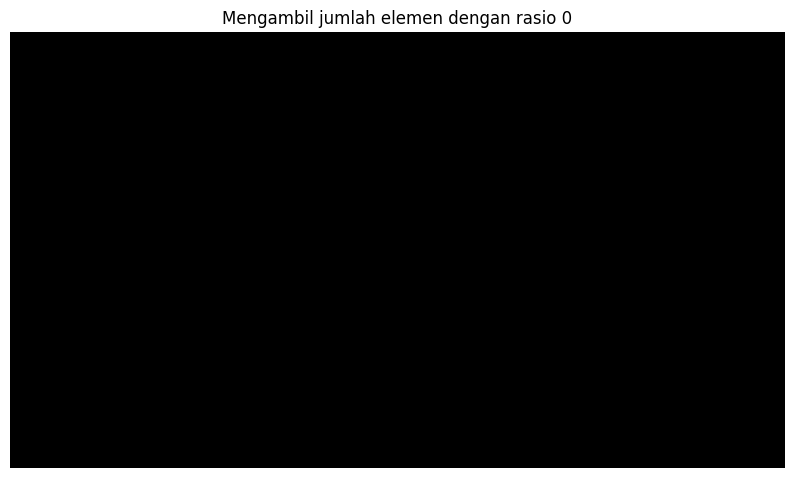

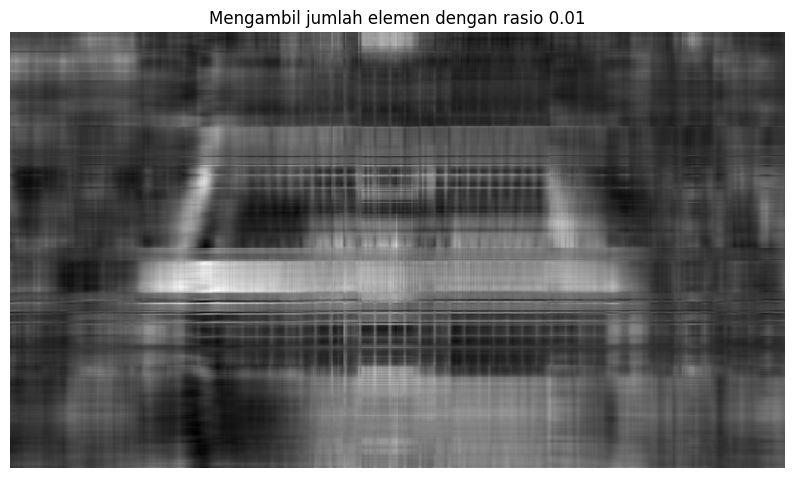

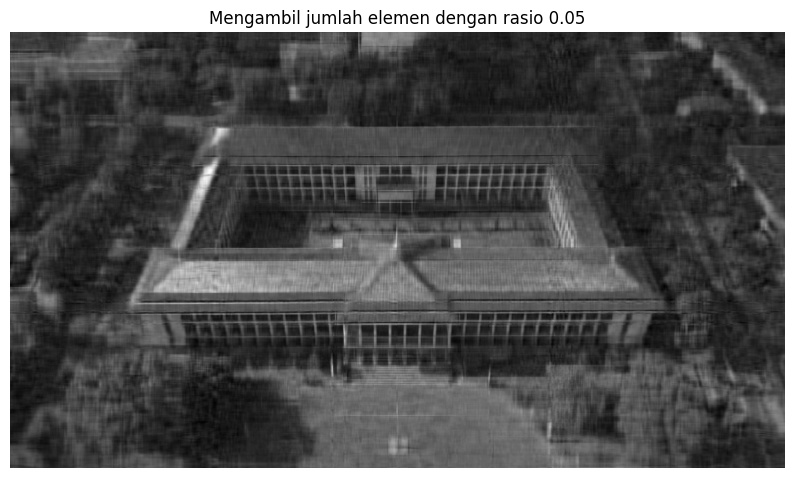

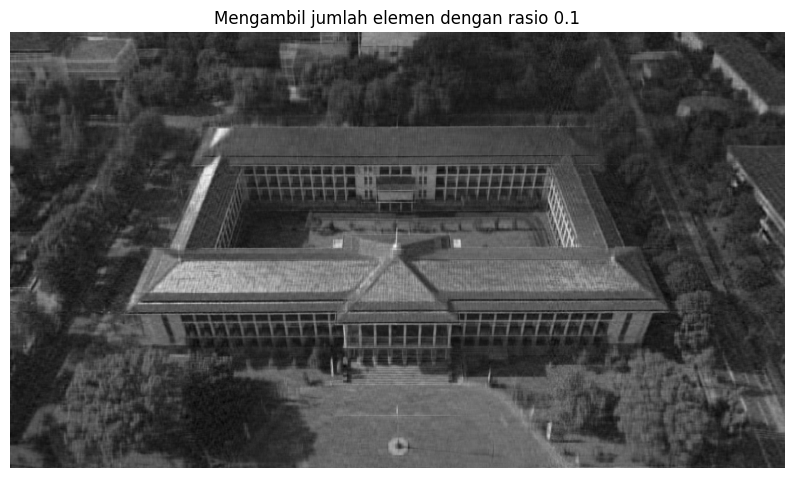

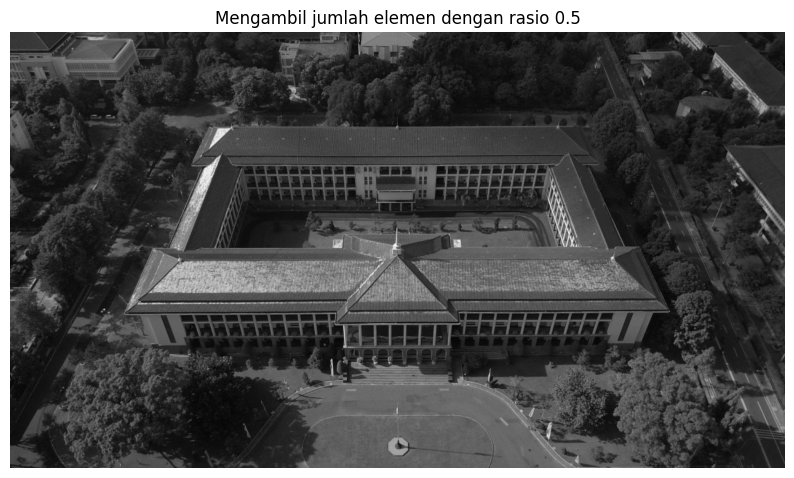

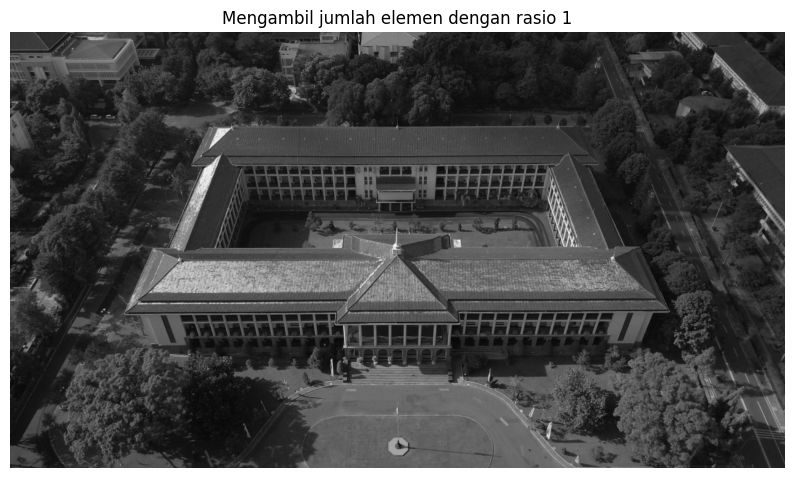

In [7]:
for ratio in (0, 0.01, 0.05, 0.1, 0.5, 1): 

    # mengompresi gambar 
    i=0
    compressedA = U[:,:int(np.shape(A)[0]*ratio)] @ Sigma[:int(np.shape(A)[0]*ratio),:int(np.shape(A)[1]*ratio)] @ Vt[:int(np.shape(A)[1]*ratio),:] 
    plt.figure(i+1, figsize=(10, 10)) 
    i += 1
    img = plt.imshow(compressedA) 
    img.set_cmap('gray') 
    plt.axis('off') 
    plt.title('Mengambil jumlah elemen dengan rasio ' + str(ratio)) 
    plt.show() 